In [0]:
import numpy as np

def f(x):  # The sigmoid function (also called logistic function)
  return 1 / (1 + np.exp(-x))

Let us start with the simplest **Item Response Theory** (IRT) model. The probability that a student of level $x$ answers correctly a question of difficulty $d$ is given by $f(x - d)$ where $f$ is defined above.

For example, if a student of level 3 attempts a question of difficulty 3, the probability of success is:

In [9]:
f(3 - 3)

0.5

If a student of level 5 attempts a question of difficulty 3:

In [10]:
f(5 - 3)

0.8807970779778823

Feel free to try other couples of student level / question difficulty.

Text(0, 0.5, 'Probability of success')

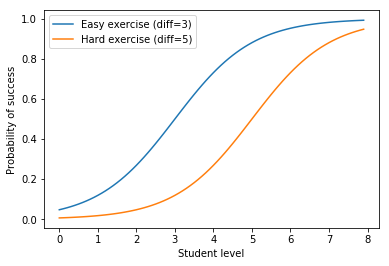

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(0.0, 8.0, 0.1)

plt.plot(x, f(x - 3), label='Easy exercise (diff=3)')
plt.plot(x, f(x - 5), label='Hard exercise (diff=5)')
plt.legend()

plt.xlabel('Student level')
plt.ylabel('Probability of success')

Thanks to this response model, from the successful and unsuccessful attempts of a student on a variety of questions, we can **infer their level by maximizing the likelihood** of the observations (or equivalently, finding the zeroes of the derivative of the likelihood).


In [0]:
from scipy.optimize import brentq  # Find the roots of a function on an interval

MAX_DIFFICULTY = 20

def p(theta, d):
  return f(theta - d)

def deriv_likelihood(theta, results):
  return sum(a - p(theta, d) for d, a in results)

def estimated_level(results):
  return brentq(lambda theta: deriv_likelihood(theta, results), -MAX_DIFFICULTY, MAX_DIFFICULTY)

In [12]:
results = [(3, 1), (4, 0)]  # Student succeeds diff. 3 but fails diff. 4
estimated_level(results)

3.5

Feel free to try other possible results.

We can now make an adaptive test! Ask questions that are close to the estimated level of the learner. Answer 1 if correct and 0 otherwise.

In [0]:
results = [(0, 1), (MAX_DIFFICULTY, 0)]  # We initialize corner cases to ensure convergence
diff = round(MAX_DIFFICULTY / 2)
for _ in range(4):
  is_correct = int(input('Ask question of difficulty {}. Correct? '.format(diff)))
  results.append((diff, is_correct))
  level = estimated_level(results)
  print('Estimated level', level)
  diff = round(level)

Ask question of difficulty 10. Correct? 1
Estimated level 15.000023006361438
Ask question of difficulty 15. Correct? 0
Estimated level 12.496099451629807
Ask question of difficulty 12. Correct? 1
Estimated level 13.584991186304315
Ask question of difficulty 14. Correct? 0
Estimated level 12.865802581226871
